<a href="https://colab.research.google.com/github/husinalhadad/husin/blob/main/Fuzzy_G_231_22_0028_Husin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Install library scikit-fuzzy
!pip install -q scikit-fuzzy --upgrade

# 2. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

# 3. Upload file CSV (manual via Google Colab)
uploaded = files.upload()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.7 MB/s eta 0:00:00


Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [3]:
base = pd.read_csv('UCI_Credit_Card.csv')
print(base.shape)

(30000, 25)


In [4]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [6]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [7]:
X = base[['LIMIT_BAL', 'BILL_TOTAL']].values

# Tampilkan beberapa baris pertama dari X
print("1 X")
print(X[:5])

1 X
[[ 20000.   7704.]
 [120000.  17077.]
 [ 90000. 101653.]
 [ 50000. 231334.]
 [ 50000. 109339.]]


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Tampilkan hasil setelah scaling
print("\n2 X")
print(X[:5])


2 X
[[-1.13672015 -0.69069198]
 [-0.3659805  -0.66599747]
 [-0.59720239 -0.44316987]
 [-0.90549825 -0.10150668]
 [-0.90549825 -0.42292   ]]


In [9]:
print("\nX.shape")
print(X.shape)

print("\nX.T.shape")
print(X.T.shape)



X.shape
(30000, 2)

X.T.shape
(2, 30000)


In [10]:
import skfuzzy as fuzz

# Menjalankan Fuzzy C-Means
r = fuzz.cmeans(
    data=X.T,
    c=3,
    m=2,
    error=0.005,
    maxiter=1000,
    init=None
)

# Menampilkan hasil
print("1 r")
print(r)


1 r
(array([[ 0.97522345, -0.42057774],
       [ 0.74964611,  2.0161462 ],
       [-0.73892823, -0.3017474 ]]), array([[0.06225583, 0.12405542, 0.01587127, ..., 0.03497224, 0.02981417,
        0.01801303],
       [0.0259268 , 0.0273302 , 0.00499224, ..., 0.01491867, 0.01406575,
        0.00906533],
       [0.91181737, 0.84861438, 0.97913649, ..., 0.95010909, 0.95612007,
        0.97292164]]), array([[0.03975716, 0.50617374, 0.41404439, ..., 0.22067672, 0.08285201,
        0.56644737],
       [0.76450832, 0.08712411, 0.24447452, ..., 0.31283467, 0.52577707,
        0.13551758],
       [0.19573452, 0.40670214, 0.34148109, ..., 0.4664886 , 0.39137092,
        0.29803505]]), array([[2.12914712, 1.3634731 , 1.57258814, ..., 2.03756037, 1.70017783,
        1.90739313],
       [3.29929546, 2.90491263, 2.80396797, ..., 3.11965881, 2.47527938,
        2.68869688],
       [0.55634189, 0.52131384, 0.2002162 , ..., 0.39091783, 0.30022685,
        0.25953426]]), array([25881.87640139, 19998.8058131

In [11]:
previsoes_porcentagem = r[1]



In [12]:
print(previsoes_porcentagem.shape)

(3, 30000)


In [13]:
print(previsoes_porcentagem)

[[0.06225583 0.12405542 0.01587127 ... 0.03497224 0.02981417 0.01801303]
 [0.0259268  0.0273302  0.00499224 ... 0.01491867 0.01406575 0.00906533]
 [0.91181737 0.84861438 0.97913649 ... 0.95010909 0.95612007 0.97292164]]


In [14]:
print(previsoes_porcentagem[0][0])

0.06225583114053661


In [15]:
print(previsoes_porcentagem[1][0])

0.02592680247233946


In [16]:
print(previsoes_porcentagem[2][0])

0.9118173663871239


In [17]:
# Menjumlahkan ketiga nilai keanggotaan untuk data ke-0 (harusnya hasil = 1.0)
total = previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]
print(total)


0.9999999999999999


In [18]:
# Mengambil indeks cluster dengan nilai keanggotaan tertinggi untuk setiap data
previsoes = previsoes_porcentagem.argmax(axis=0)
print(previsoes)


[2 2 2 ... 2 2 2]


In [19]:
print(previsoes[5000])


2


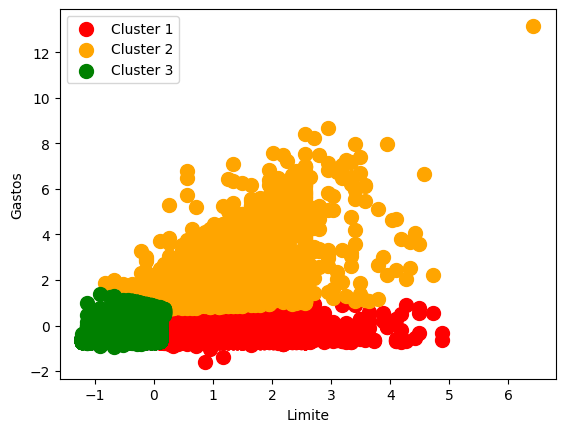

In [20]:
# Visualisasi hasil clustering
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c='green', label='Cluster 3')

plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()
plt.show()